<a href="https://colab.research.google.com/github/itsbilyatt/web-scraping-in-python/blob/main/Extracting_Stock_Data_Using_a_yfinance_library_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1>Extracting Stock Data Using a yfinance library</h1>**

In [85]:
#  prajyot birajdar
# Email :      prajyotbirajadar1998@gmail.com
# linkedin: https://www.linkedin.com/in/prajyot-birajdar-1b09a1173/

In [86]:
# !pip install yfinance

In [87]:
# import required library
import time
import numpy as np
import pandas as pd
import yfinance as yf



==> Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock.
here the company is Tesla and the ticker symbol is `TSLA`.


In [ ]:
tesla_data = yf.Ticker("TSLA")

In [88]:
# to extract information related stock result will be in form of key 

tesla_info = tesla_data.fast_info

tesla_info


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [89]:
# we can check stock information 
# to check currency 

tesla_info['currency']

'USD'

In [90]:
# To check day high and day low price of stock 

# dayhigh
print(tesla_info['dayHigh'])

# daylow
tesla_info['dayLow']

197.6699981689453


192.8000030517578

### Extracting Share Price


In [91]:
# get historical market data of given share

# Using the period parameter we can set how far back from the present to get data.
#  The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


tesla_hist_data =tesla_data.history(period="max") 

In [92]:
# To see first five row of given dataset we use head(),To see last five row use tail()

tesla_hist_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [93]:

# We can reset the index of the DataFrame with the `reset_index` function.
#  We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

tesla_hist_data.reset_index(inplace=True)

In [94]:
tesla_hist_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [95]:
# shape of dataframe (number of row, number of column)
tesla_hist_data.shape

(3187, 8)

In [96]:
# To see name of columns present in dataset
tesla_hist_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

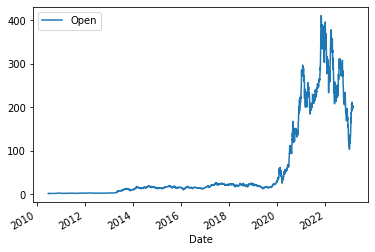

In [97]:
# We can plot the `Open` price against the `Date`:
tesla_hist_data.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

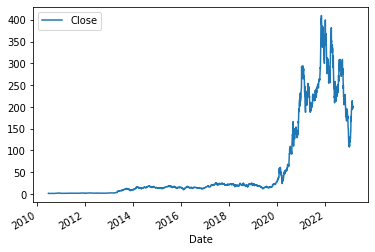

In [98]:
tesla_hist_data.plot(x="Date", y="Close")

<AxesSubplot:xlabel='Low'>

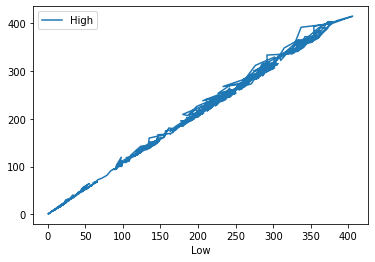

In [100]:
# Low price  vs high price
tesla_hist_data.plot(x="Low", y="High")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [101]:
# to count missing data
tesla_hist_data.Dividends.isnull().count

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
3182    False
3183    False
3184    False
3185    False
3186    False
Name: Dividends, Length: 3187, dtype: bool>

<AxesSubplot:xlabel='Date'>

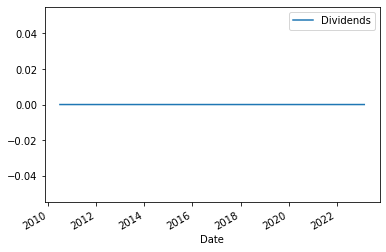

In [102]:
tesla_hist_data.plot(x="Date", y="Dividends")